In [6]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

0.9500000000000002
0.7046267409484535
0.6395876034836161
0.4672397664838126
0.25336117989360574
0.15925853784234256
0.11367578331351336
0.08784031172012963
0.07139593661446586
0.060052728444540904
0.05176753185877381
0.04545459553022635
0.04048632150943288
0.036475411756290654
0.03317012328004321
0.030399800861871107
0.02804468265684168
0.026018251456023656
0.0242564504424001
0.022710840191338733
0.02134411358363142
0.020127072391304957
0.019036538443826245
0.018053878833260484
0.017163944388145502
0.0163542923244151
0.015614608102282546
0.014936269368837074
0.014312012850563605
0.013735676914657269
0.01320200047968978
0.012706464395486172
0.01224516518684915
0.01181471371345122
0.011412153194487296
0.01103489241647182
0.010680650943483805
0.010347413888338153
0.010033394354566738
0.00973700207424244
0.00945681708197288
0.009191567506894316
0.008940110750806696
0.008701417465486472
0.008474557855584486
0.008258689922877593
0.008053049338448304
0.00785694068585574
0.007669729863649444
0

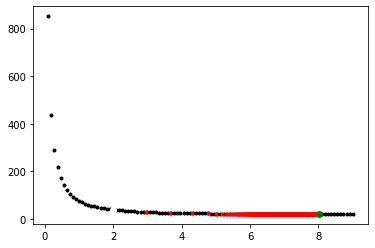

In [45]:
from numpy.core.fromnumeric import resize

X=[1,2,3,3,7,3,5,4,6,2,4]

XX=np.zeros(len(X))
for it, th in enumerate(X):
    XX[it]=X[it]**2


Xlog=np.zeros(len(X))
for it, th in enumerate(X):
    Xlog[it]=np.log(X[it])


Slx=sum(Xlog)
Sxx=sum(XX)

N=len(X)
func = lambda th: 11*np.log(th[0])-12.80 + 178/(2*th[0])

#Representacion 

_x =np.linspace(0.1,9, 100)
_y=np.zeros(100)
for ix, x in enumerate(_x):
  _y[ix]=func([x])

plt.plot(_x,_y, ".", c = "black")

#Algorimo AdaMax

Theta = [2]
Thetaold=[0]
lr=0.95  
b1= 0.9
b2=0.999
k=1
E=10**(-8)
plt.plot(Theta[0],func(Theta), "o", c = "white")
grad=np.zeros(1)
m=[0]
v=[0]
vv=np.zeros(1)
U=np.zeros(1)
M=np.zeros(1)
contador= 0
diferencia=1

for _ in range(10000):

  if diferencia < 0.000185:
    break
  else:
    grad[0] = N/Theta[0] - Sxx/2*Theta[0]**2
  #print(grad))
    for it, th in enumerate(Theta):
        vv[it]=v[it]
        m[it]= b1*m[it] + (1-b1)* grad[it]
        v[it]= b2*v[it] + (1-b2)* grad[it]**2
    
    b1k= b1**(k)
    b2k= b2**(k)
    k=k+1

    for it, th in enumerate(Theta):

      M[it]= m[it]/(1-b1k)
    
      if b2*vv[0] < abs(grad[0]):
        U[it]=abs(grad[it])
      else:
        U[it]=b2*vv[it]
    
    for it, th in enumerate(Theta):  

      Thetaold[it]=Theta[it]
      Theta[it] = Theta[it] - lr * M[it]/ U[it]
    plt.plot(Theta[0],func(Theta), ".", c = "red")

    diferencia=abs(Thetaold[0]-Theta[0])
    print(diferencia)
    contador=contador+1

print(Theta)
print(contador)
plt.plot(Theta[0],func(Theta), "o", c = "green")

plt.show()

